In [1]:
#Importing packages
import pandas as pd #<--Excel reader
import numpy as np #<--Mathematical operator
from sklearn.preprocessing import StandardScaler, MinMaxScaler #<--data scaling
from sklearn.decomposition import PCA #<--PCA
from sklearn.manifold import TSNE #<--T-SNE
from sklearn.metrics import silhouette_score, davies_bouldin_score #<--Clustering metrics
from sklearn.cluster import KMeans #<--Clustering
import matplotlib.pyplot as plt #<-- ferramenta para visualizar graficos


In [2]:
data = pd.read_excel('processed.xlsx')#<--funcao do pandas que le xlsx
print(data.head()) #<-- mostra apenas os 5 primeiras linhas do dataset

  techs   clone  diam_vaso  area_lume  freq  esp_vaso  pared_vaso   conduti  \
0  4CEB  AEC144      97.90    9730.85    22      6.35        9.73  0.214079   
1  4CEB  AEC144      92.55    7239.84    21      7.05        9.10  0.152037   
2  4CEB  AEC144      82.99    7801.39    18      6.29       19.60  0.140425   
3  4CEB  AEC144     103.19    9804.07    24      6.78       11.66  0.235298   
4  4CEB  AEC144     110.64   11630.85    15      7.63       25.03  0.174463   

          s  cond_teorica  cond_hidra  implosao       vul  
0  0.000442  2.250106e-09    0.002083  0.009878  4.450000  
1  0.000345  1.797123e-09    0.001101  0.009668  4.407143  
2  0.000433  1.161917e-09    0.001096  0.055778  4.610556  
3  0.000409  2.777299e-09    0.002307  0.012768  4.299583  
4  0.000775  3.670463e-09    0.002029  0.051180  7.376000  


In [3]:
join = data['techs'].str.cat(data['clone']) #<--uni as categorias techs and clone para formar uma label unica
labels = np.unique(join) #<-- operacao que retirar apenas os numeros unicos de um vector
print(labels) #<-- mostra o que tem dentro da variavel labels

['20IPBAEC144' '20IPBAEC144E' '20IPBCOP1277' '20IPBCOP1277E' '30VMTAEC144'
 '30VMTAEC144E' '30VMTCOP1277' '30VMTCOP1277E' '4CEBAEC144' '4CEBAEC144E'
 '4CEBCOP1277' '4CEBCOP1277E' '7CCOAEC144' '7CCOAEC144E' '7CCOCOP1277'
 '7CCOCOP1277E']


In [4]:
data.drop(labels=['techs', 'clone'], inplace = True, axis = 1)#<-- como passei tech e clone para a variavel label eu removo elas
data.head()#<-- mostra apenas os 5 primeiros dados

,diam_vaso,area_lume,freq,esp_vaso,pared_vaso,conduti,s,cond_teorica,cond_hidra,implosao,vul
0,97.90,9730.85,22,6.35,9.73,0.214079,0.000442,2.250106e-09,0.002083,0.009878,4.450000
1,92.55,7239.84,21,7.05,9.10,0.152037,0.000345,1.797123e-09,0.001101,0.009668,4.407143
2,82.99,7801.39,18,6.29,19.60,0.140425,0.000433,1.161917e-09,0.001096,0.055778,4.610556
3,103.19,9804.07,24,6.78,11.66,0.235298,0.000409,2.777299e-09,0.002307,0.012768,4.299583
4,110.64,11630.85,15,7.63,25.03,0.174463,0.000775,3.670463e-09,0.002029,0.051180,7.376000


In [5]:
y1 = data.iloc[:,8:9] ###<---- pega somente a condutividade hidraulica
y2 = data.iloc[:,9:10] ###<---- pega somente a implosao
y3 = data.iloc[:,10:11] ###<---- pega somente a vulnerabilidade


In [6]:
data.drop(labels=['cond_hidra', 'implosao', 'vul'], inplace = True, axis = 1)
#elas agora sao y1, y2, y3... eu removi elas to dataset


In [7]:
data.dropna(inplace=True)#<-- remove qualquer dado faltante

In [8]:
x_values = data.values#<--.values eh um atributo de pandas. ele retorna apenas os valores em um array (n_amostras, n_features)
print("Shape do array eh:", x_values.shape) #<-- shape do array
sc = StandardScaler() #<--prepara para padronizar os dados
x_values_processed = sc.fit_transform(x_values) #<-- padronizacao dos dados
#print(x_values_processed)#<-- teste de sanidade
t = pd.DataFrame(x_values_processed)#<--salva os dados processados para arquivo csv
t.to_csv('test.csv')#<--arquivo .csv criado



Shape do array eh: (11175, 8)


In [9]:
pca = PCA(n_components=6, random_state=199)
#chama PCA, escolhe o numero de components -- random_state eh apenas para reproducao dos resultados

In [10]:
x_pca = pca.fit_transform(x_values_processed)#<-- Calculo das PC

In [11]:
pca.explained_variance_ratio_ #<--Quantidade de variacao explicada pelas componentes


array([0.45846622, 0.1733162 , 0.13128225, 0.11651742, 0.09261938,
       0.01961537])

In [12]:
print("Soma da variacao das componentes principais eh",100*(sum(pca.explained_variance_ratio_)),"%")

Soma da variacao das componentes principais eh 99.1816836456122 %


In [13]:
pca.explained_variance_ #<--Eigenvalues -- Eu acho

array([3.66805799, 1.3866537 , 1.05035198, 0.93222275, 0.74102134,
       0.15693702])

In [14]:
print(x_pca) #<-- Apenas mostra as componentes principais

[[-1.12087559  1.47765531 -0.36029767 -0.36915977  0.97565853 -0.21794614]
 [-1.77589715  0.33596173  0.05841831 -0.32400642  1.51643738 -0.00442147]
 [-1.38153424 -0.21720067  0.93456697  0.05298578 -1.00245156 -0.07339311]
 ...
 [-2.56834177  1.01465427  0.27406708  0.06654623  0.9480167   0.23735464]
 [-2.765306    1.33497298  0.41730023 -0.30757104  1.00904292  0.43943386]
 [-3.41702097 -0.17658953 -0.44277964  0.04766508  0.37390706  0.43816128]]


Text(0.5, 0, 'Principal component 1')

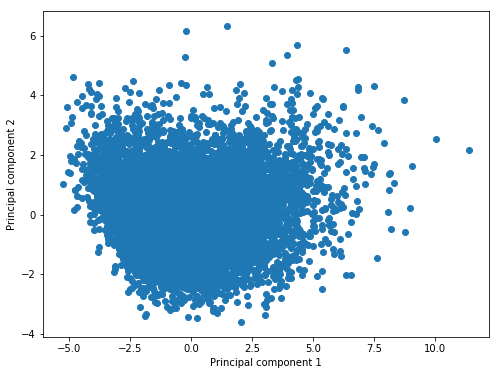

In [15]:
#basica plotagem da figura
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.ylabel("Principal component 2")
plt.xlabel("Principal component 1")

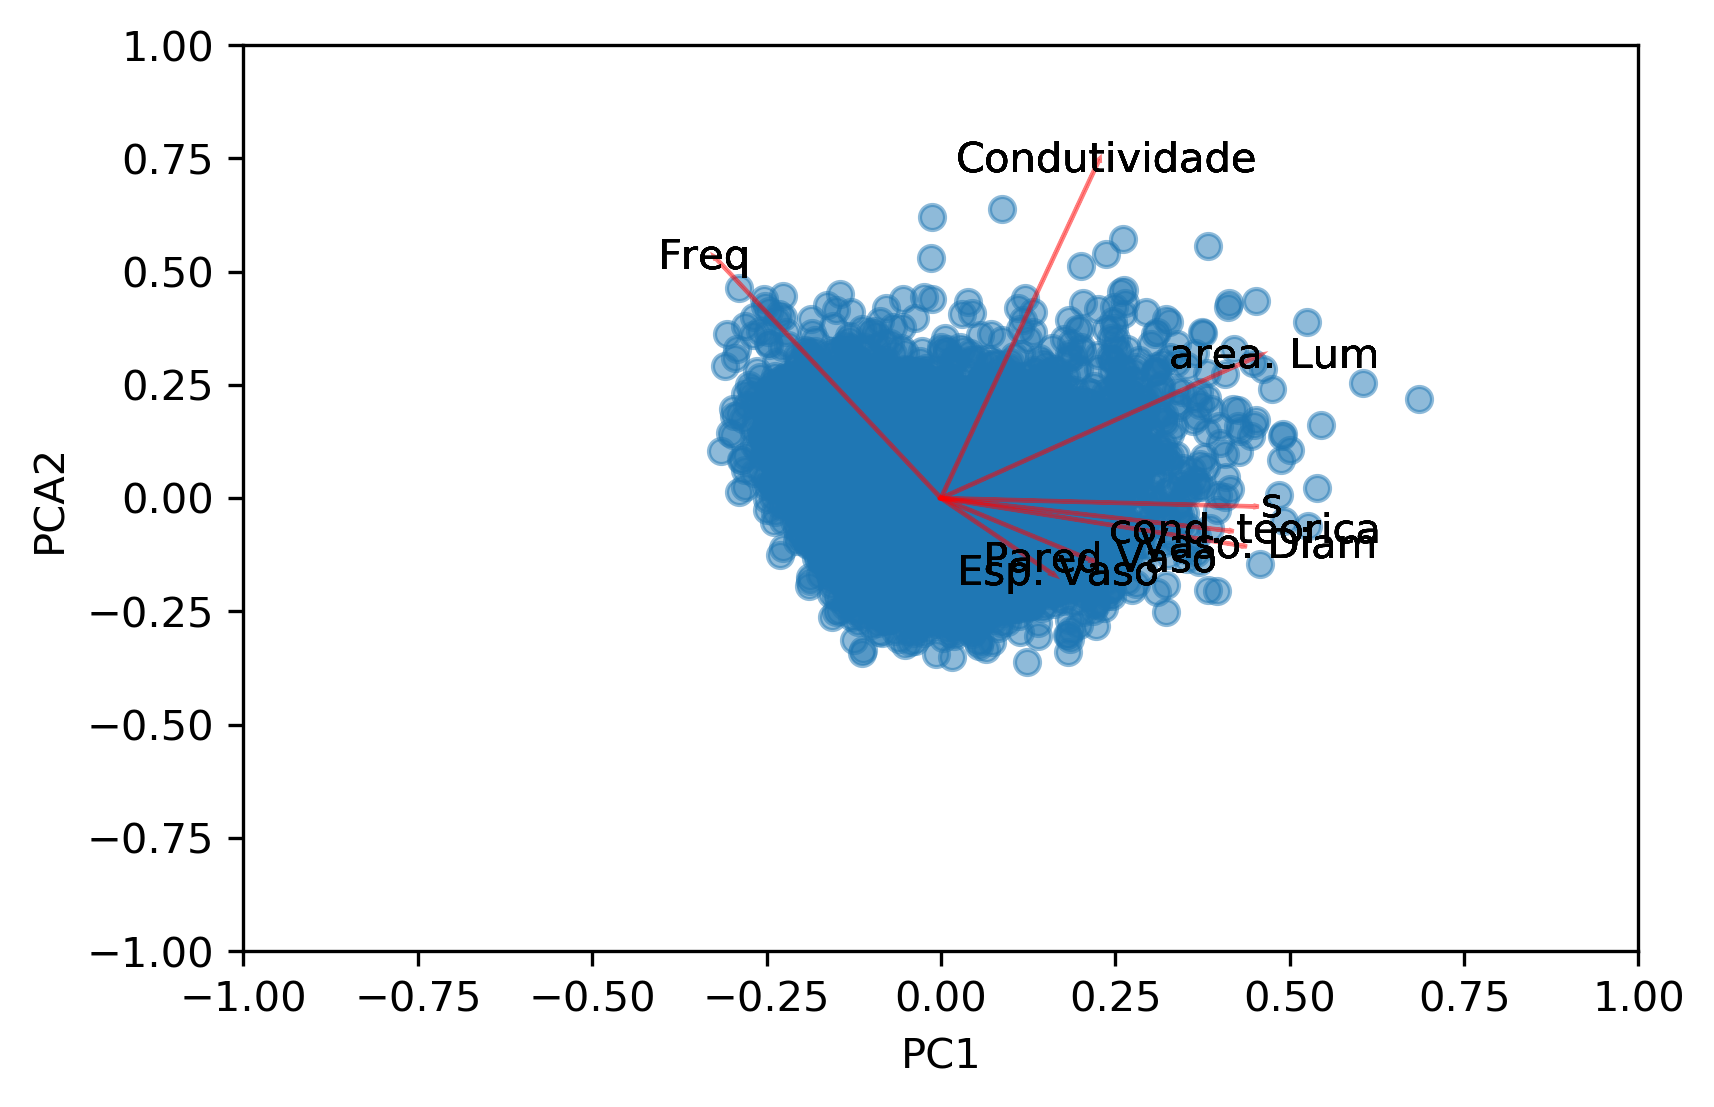

In [16]:
# "Elegante" funcao para plotar os eigenvectors
def myplot(score, coeff, labels=None):
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(6,4), dpi = 300, facecolor = 'w')
    plt.scatter(xs * scalex, ys*scaley, alpha = 0.5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i, 1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[0,0]*1.05, coeff[0,1] * 1, "Vaso. Diam", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[1,0]*1.05, coeff[1,1] * 1, "area. Lum", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[2,0]*1.05, coeff[2,1] * 1, "Freq", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[3,0]*1.05, coeff[3,1] * 1, "Esp. Vaso", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[4,0]*1.05, coeff[4,1] * 1, "Pared Vaso", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[5,0]*1.05, coeff[5,1] * 1, "Condutividade", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[6,0]*1.05, coeff[6,1] * 1, "s", color = 'black', ha = 'center', va = 'center')
            plt.text(coeff[7,0]*1.05, coeff[7,1] * 1, "cond. teorica", color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1] *1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PCA{}".format(2))
    plt.show()

myplot(x_pca[:,0:2], np.transpose(pca.components_[0:2, :]))
plt.show()


In [40]:
print(np.transpose(pca.components_[0:6, :]))
eigenvectors = pd.DataFrame(np.transpose(pca.components_[0:2, :]), columns =  ["PC1", "PC2"])
eigenvectors.to_csv('eigenvectors.csv')

[[ 0.43411413 -0.105449   -0.17450943 -0.48733818  0.08399079 -0.21245962]
 [ 0.4554492   0.31430829 -0.03351336  0.32099819 -0.00661571 -0.03907685]
 [-0.32327125  0.53031697  0.17641356 -0.38188006  0.0196485   0.58936645]
 [ 0.15999349 -0.16715138  0.73275162  0.02148692  0.63949509  0.01073463]
 [ 0.21681186 -0.13776961  0.58621111 -0.12548188 -0.75793918  0.01216002]
 [ 0.22646957  0.74590815  0.11675241  0.00571689  0.01268083 -0.38901573]
 [ 0.45100046 -0.01831115 -0.11012914  0.43323835 -0.01483747  0.62898045]
 [ 0.41510416 -0.0722524  -0.17599319 -0.55650135  0.09332202  0.24242184]]


In [18]:
Correlations = pd.DataFrame(np.transpose(pca.components_[0:6, :]), columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"],
                           index = ["Vaso. Diam", "area. Lum", "Freq", "Esp. Vaso",
                                   "Pared Vaso", "Condutividade", "s", "cond. teorica"] )

In [37]:
print(Correlations)
Correlations.to_csv('Correlacoes_PCA_vs_variaveis.csv')

                    PC1       PC2       PC3       PC4       PC5       PC6
Vaso. Diam     0.434114 -0.105449 -0.174509 -0.487338  0.083991 -0.212460
area. Lum      0.455449  0.314308 -0.033513  0.320998 -0.006616 -0.039077
Freq          -0.323271  0.530317  0.176414 -0.381880  0.019648  0.589366
Esp. Vaso      0.159993 -0.167151  0.732752  0.021487  0.639495  0.010735
Pared Vaso     0.216812 -0.137770  0.586211 -0.125482 -0.757939  0.012160
Condutividade  0.226470  0.745908  0.116752  0.005717  0.012681 -0.389016
s              0.451000 -0.018311 -0.110129  0.433238 -0.014837  0.628980
cond. teorica  0.415104 -0.072252 -0.175993 -0.556501  0.093322  0.242422


([<matplotlib.axis.XTick at 0x22e37b0d9b0>,
 <a list of 6 Text xticklabel objects>)

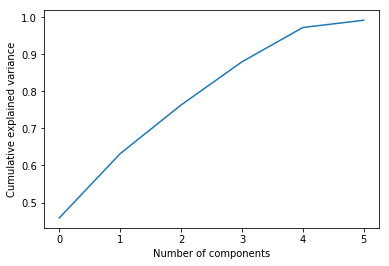

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(0,len(pca.explained_variance_ratio_)+1))

# K-means

K-means eH clusters. Tem varios tipos de clusters. O que vamos fazer eh rodar cluster com os dados das duascomponentes principais.
Vamos tambem rodar t-SNE e rodar cluster com as componentes gerada por t-SNE.

Depois nos vamos matematicamente calculcar quantos clusters sao necessarios atraves de silhoutte score e davies-bouldin score

In [21]:
kmeans_pca = KMeans(n_clusters=2, random_state=199)

In [22]:
kmeans_pca.fit(x_pca)

KMeans(n_clusters=2, random_state=199)

In [23]:
y_kmeans_pca = kmeans_pca.predict(x_pca)
print(y_kmeans_pca)

[0 0 0 ... 0 0 0]


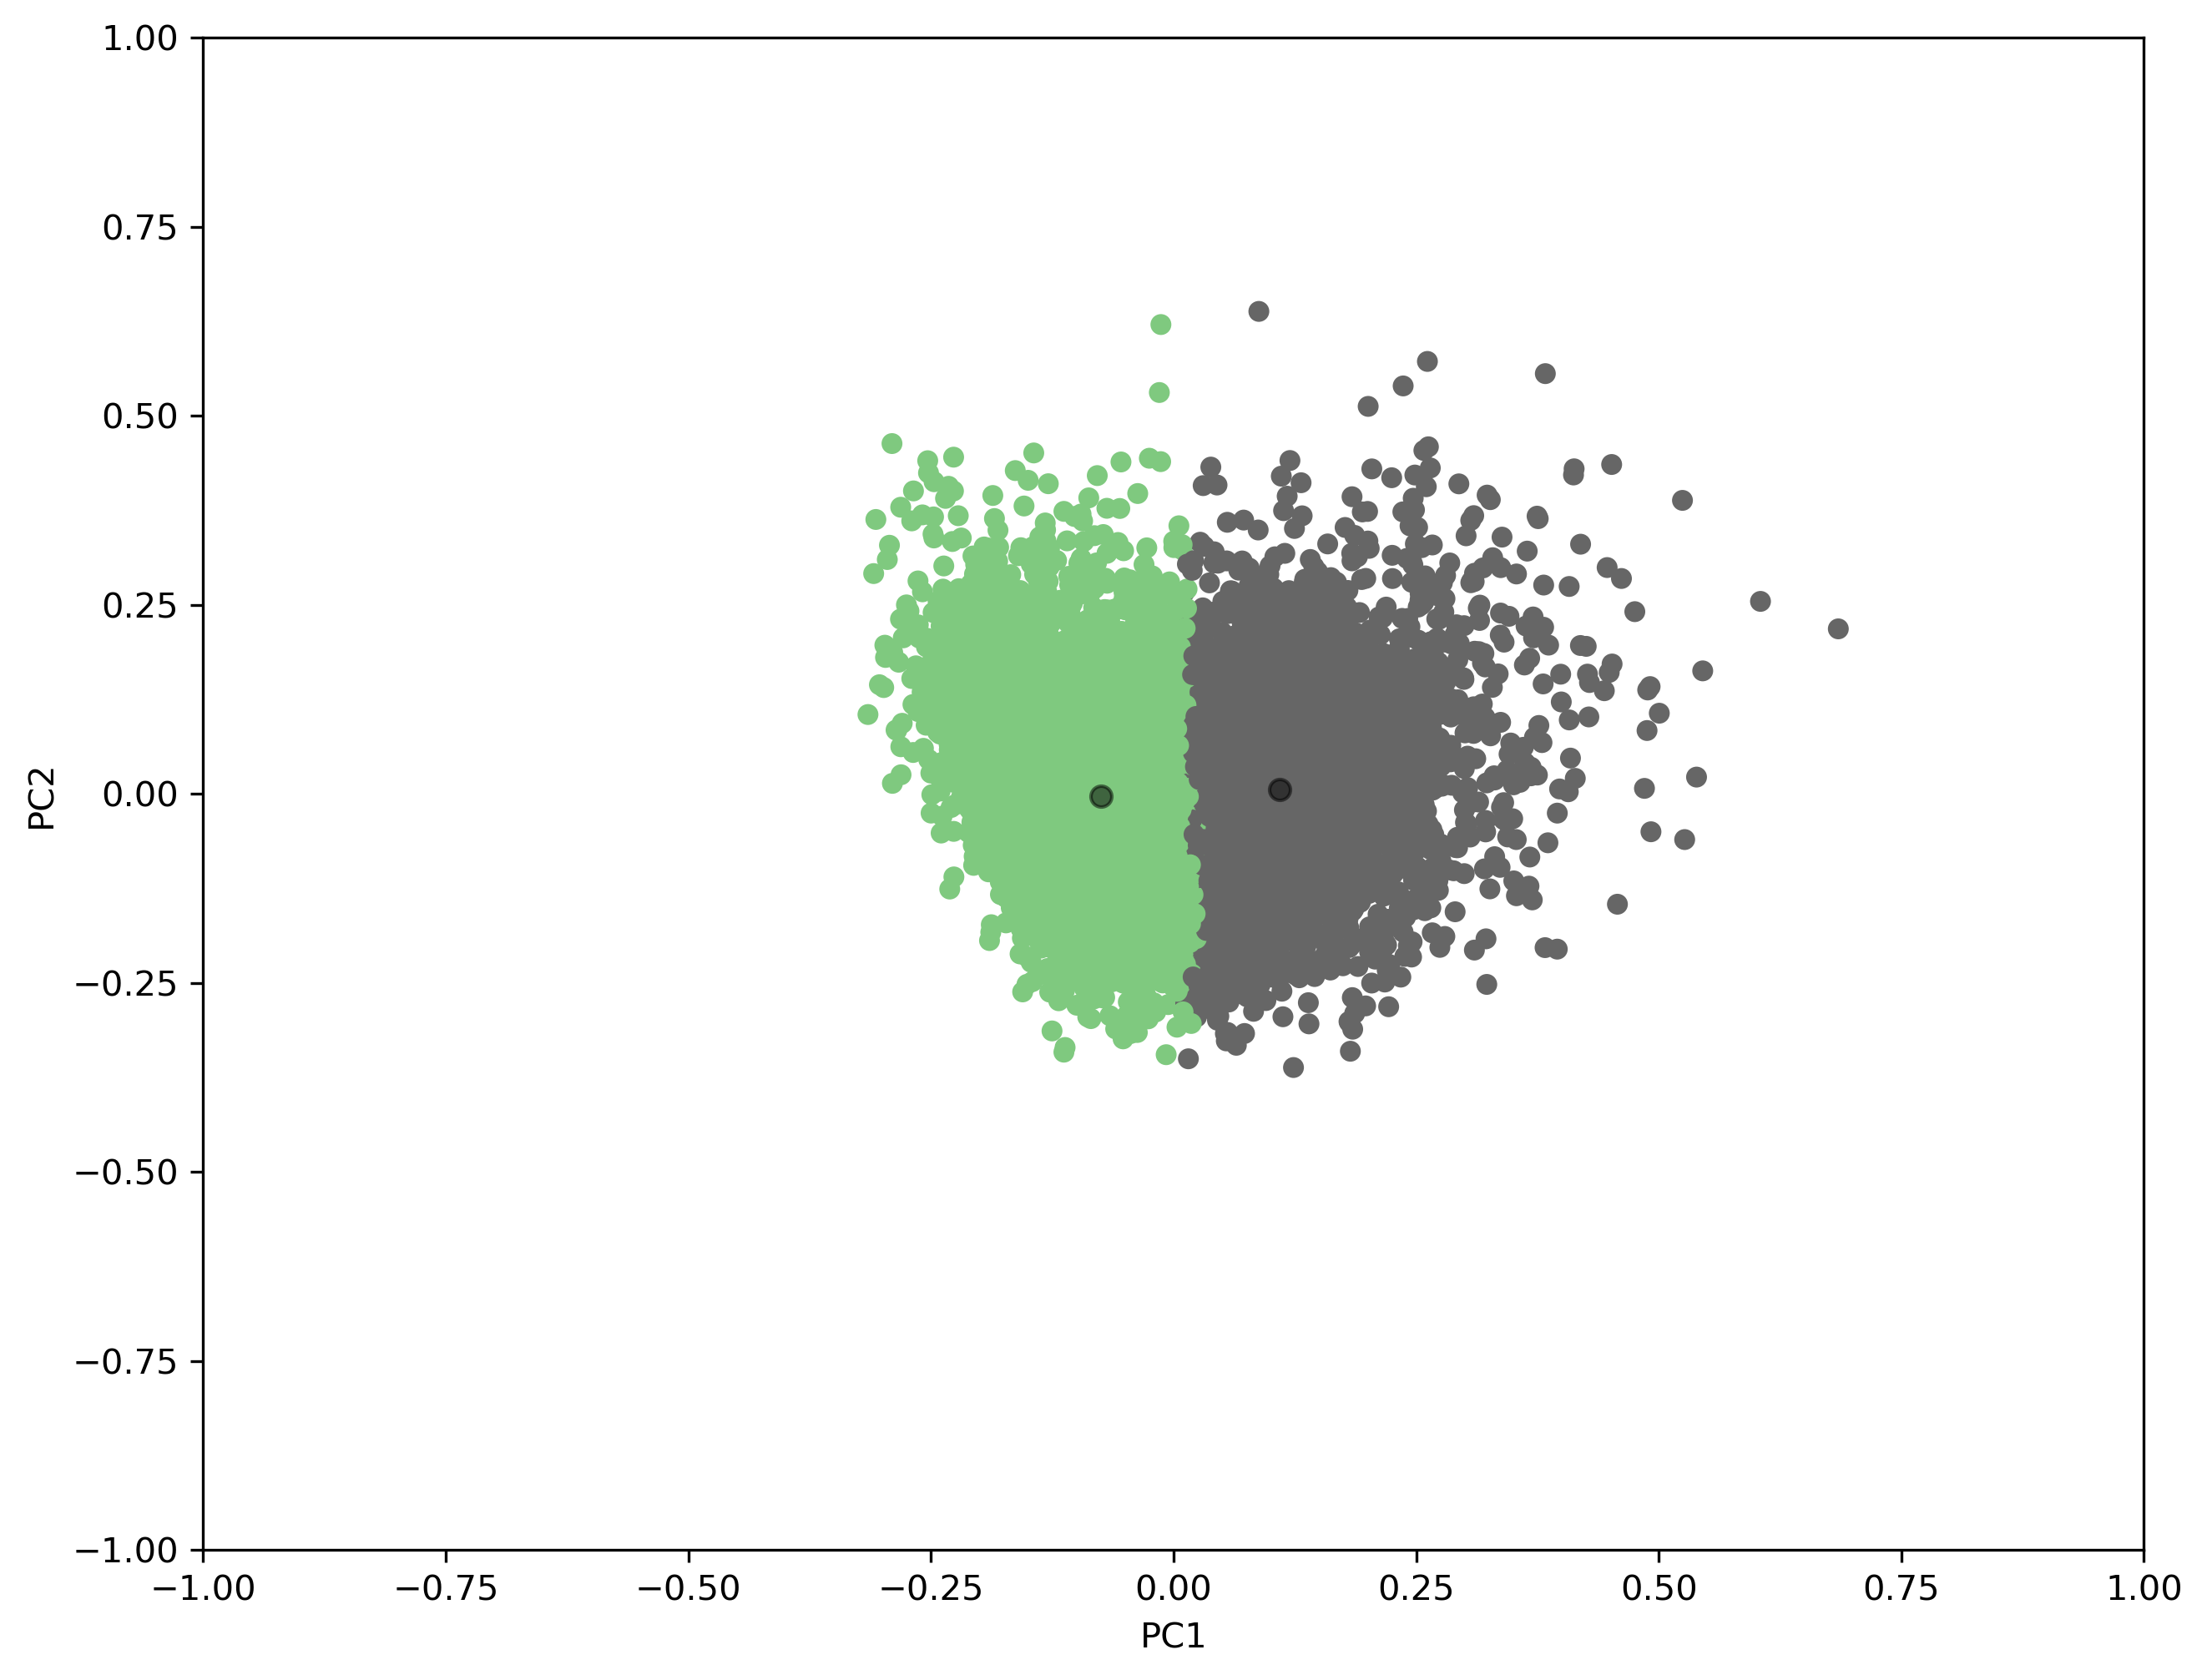

In [24]:
xs = x_pca[:,0]
ys = x_pca[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

plt.figure(figsize=(10,8), dpi = 300, facecolor='w')

plt.scatter(xs* scalex, ys*scaley, c = y_kmeans_pca, s=25, cmap = 'Accent')
centers_pca = kmeans_pca.cluster_centers_
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(centers_pca[:,0]*scalex, scaley*centers_pca[:,1], c='black', alpha = 0.5)


# t-SNE and KMeans cluster

In [25]:
#interessante para colocar no artigo o valor de KL divergence after 10000 iteracoes. 
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=10000, learning_rate=50, random_state=199)
tsne_results = tsne.fit_transform(x_pca)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 11175 samples in 0.131s...
[t-SNE] Computed neighbors for 11175 samples in 1.702s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11175
[t-SNE] Computed conditional probabilities for sample 2000 / 11175
[t-SNE] Computed conditional probabilities for sample 3000 / 11175
[t-SNE] Computed conditional probabilities for sample 4000 / 11175
[t-SNE] Computed conditional probabilities for sample 5000 / 11175
[t-SNE] Computed conditional probabilities for sample 6000 / 11175
[t-SNE] Computed conditional probabilities for sample 7000 / 11175
[t-SNE] Computed conditional probabilities for sample 8000 / 11175
[t-SNE] Computed conditional probabilities for sample 9000 / 11175
[t-SNE] Computed conditional probabilities for sample 10000 / 11175
[t-SNE] Computed conditional probabilities for sample 11000 / 11175
[t-SNE] Computed conditional probabilities for sample 11175 / 11175
[t-SNE] Mean sigma: 0.401428
[t-SNE] KL divergence

In [26]:
kmeans_tse = KMeans(n_clusters=2, random_state=199)

In [27]:
kmeans_tse.fit(tsne_results)

KMeans(n_clusters=2, random_state=199)

In [28]:
y_kmeans_tsne = kmeans_tse.predict(tsne_results)

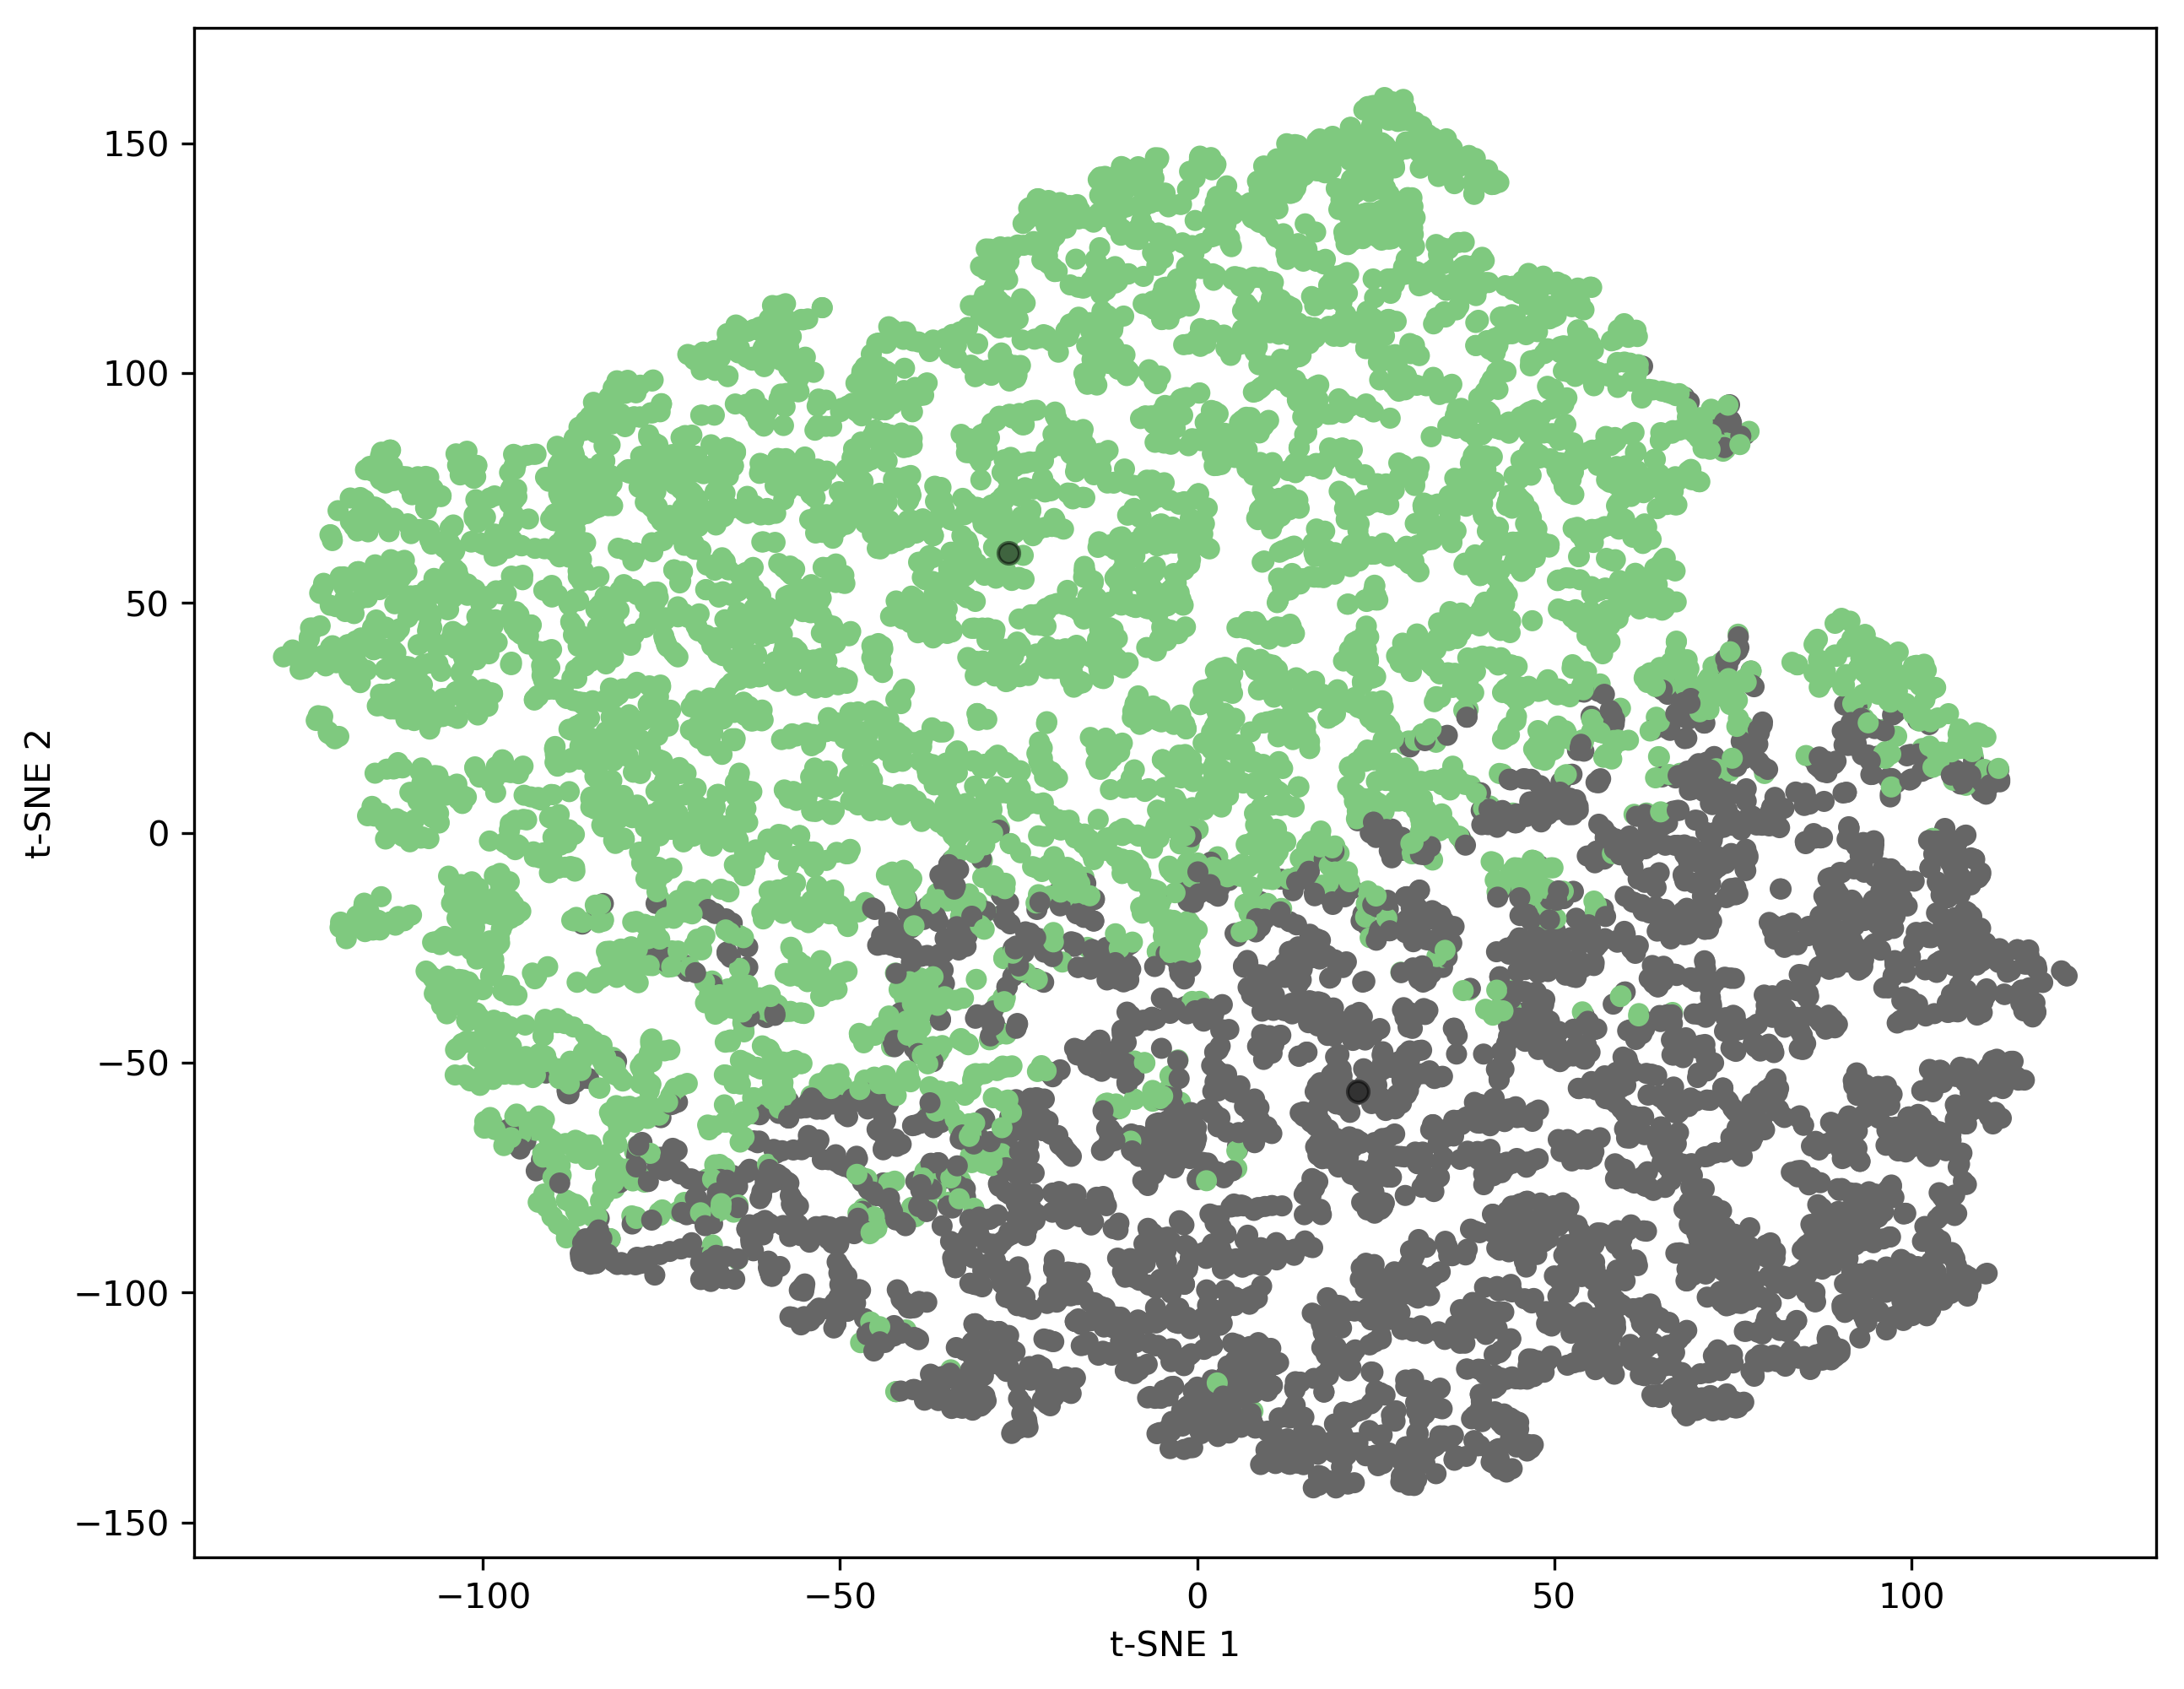

In [29]:
plt.figure(figsize=(10,8), dpi = 300, facecolor='w')

plt.scatter(tsne_results[:,0], tsne_results[:,1], c = y_kmeans_pca, s=25, cmap = 'Accent')
centers_tsne = kmeans_tse.cluster_centers_
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.scatter(centers_tsne[:,0], centers_tsne[:,1], c='black', alpha = 0.5)


# METRICS

============SILHOUTTE_SCORE================

In [30]:
#Quanto mais alto esse numero melhor. 
##Note que t-SNE eh melhor para separar os dados
for k in range(2, 21):
    kmeans_SS = KMeans(n_clusters=k, random_state=1).fit(x_pca)
    labels = kmeans_SS.labels_
    print("for", k, "clusters", "SS is:", silhouette_score(x_pca, labels), "for pca")

for 2 clusters SS is: 0.2623449981190746 for pca
for 3 clusters SS is: 0.1887325382538843 for pca
for 4 clusters SS is: 0.1694018758931769 for pca
for 5 clusters SS is: 0.1751825482838687 for pca
for 6 clusters SS is: 0.17721203837093402 for pca
for 7 clusters SS is: 0.16602244146879602 for pca
for 8 clusters SS is: 0.1510845923130059 for pca
for 9 clusters SS is: 0.15965097159225766 for pca
for 10 clusters SS is: 0.155495604405097 for pca
for 11 clusters SS is: 0.14950842299388115 for pca
for 12 clusters SS is: 0.15203513524684367 for pca
for 13 clusters SS is: 0.15084161755294934 for pca
for 14 clusters SS is: 0.14321039031112112 for pca
for 15 clusters SS is: 0.13978531393134272 for pca
for 16 clusters SS is: 0.13863233565495006 for pca
for 17 clusters SS is: 0.13720174142932434 for pca
for 18 clusters SS is: 0.1360074598547744 for pca
for 19 clusters SS is: 0.13333622634859163 for pca
for 20 clusters SS is: 0.13352312912438588 for pca


In [31]:
#t-SNE numero de clusters
for k in range(2, 21):
    kmeans_SS_tsne = KMeans(n_clusters=k, random_state=1).fit(tsne_results)
    labels = kmeans_SS_tsne.labels_
    print("for", k, "clusters", "SS is:", silhouette_score(tsne_results, labels), "for tsne")

for 2 clusters SS is: 0.3976732 for tsne
for 3 clusters SS is: 0.39228475 for tsne
for 4 clusters SS is: 0.3775088 for tsne
for 5 clusters SS is: 0.38862762 for tsne
for 6 clusters SS is: 0.37104782 for tsne
for 7 clusters SS is: 0.3857989 for tsne
for 8 clusters SS is: 0.36325502 for tsne
for 9 clusters SS is: 0.3650602 for tsne
for 10 clusters SS is: 0.36488765 for tsne
for 11 clusters SS is: 0.36881682 for tsne
for 12 clusters SS is: 0.36025685 for tsne
for 13 clusters SS is: 0.3611383 for tsne
for 14 clusters SS is: 0.35590503 for tsne
for 15 clusters SS is: 0.36306015 for tsne
for 16 clusters SS is: 0.3673905 for tsne
for 17 clusters SS is: 0.36379924 for tsne
for 18 clusters SS is: 0.3548554 for tsne
for 19 clusters SS is: 0.36329693 for tsne
for 20 clusters SS is: 0.36286724 for tsne


# ============Davies_bauldin_score============

In [32]:
##Quanto mais baixo esse numero melhor. Vceja que 0.397 eh o maior numero, que significa que 2 clusters foi melhor
##Note que t-SNE eh melhor em separar os dados que PCA. Pq para PCA DB score eh 1.44 e t-sne eh 0.39
for k in range(2, 21):
    kmeans_DB = KMeans(n_clusters=k, random_state=1).fit(x_pca)
    labels = kmeans_DB.labels_
    print("for", k, "clusters", "DB is:", davies_bouldin_score(x_pca, labels), "for pca")

for 2 clusters DB is: 1.4472636000899126 for pca
for 3 clusters DB is: 1.5610988325684547 for pca
for 4 clusters DB is: 1.6697352938400927 for pca
for 5 clusters DB is: 1.5825781644295005 for pca
for 6 clusters DB is: 1.4938524485061138 for pca
for 7 clusters DB is: 1.5092472576900173 for pca
for 8 clusters DB is: 1.53479404050579 for pca
for 9 clusters DB is: 1.4960428972441668 for pca
for 10 clusters DB is: 1.4886691847539137 for pca
for 11 clusters DB is: 1.5046865016134148 for pca
for 12 clusters DB is: 1.4684857337386896 for pca
for 13 clusters DB is: 1.4485604826479472 for pca
for 14 clusters DB is: 1.4563343679587761 for pca
for 15 clusters DB is: 1.4559013653156165 for pca
for 16 clusters DB is: 1.4879833080709672 for pca
for 17 clusters DB is: 1.4336945814142432 for pca
for 18 clusters DB is: 1.428082209390978 for pca
for 19 clusters DB is: 1.445843511145703 for pca
for 20 clusters DB is: 1.4349085532200776 for pca


In [34]:
#Quanto mais baixo esse numero melhor. Vceja que 0.397 eh o maior numero, que significa que 2 clusters foi melhor
for k in range(2, 21):
    kmeans_DB_tsne = KMeans(n_clusters=k, random_state=1).fit(tsne_results)
    labels = kmeans_DB_tsne.labels_
    print("for", k, "clusters", "DB is:", silhouette_score(tsne_results, labels), "for tsne")

for 2 clusters DB is: 0.3976732 for tsne
for 3 clusters DB is: 0.39228475 for tsne
for 4 clusters DB is: 0.3775088 for tsne
for 5 clusters DB is: 0.38862762 for tsne
for 6 clusters DB is: 0.37104782 for tsne
for 7 clusters DB is: 0.3857989 for tsne
for 8 clusters DB is: 0.36325502 for tsne
for 9 clusters DB is: 0.3650602 for tsne
for 10 clusters DB is: 0.36488765 for tsne
for 11 clusters DB is: 0.36881682 for tsne
for 12 clusters DB is: 0.36025685 for tsne
for 13 clusters DB is: 0.3611383 for tsne
for 14 clusters DB is: 0.35590503 for tsne
for 15 clusters DB is: 0.36306015 for tsne
for 16 clusters DB is: 0.3673905 for tsne
for 17 clusters DB is: 0.36379924 for tsne
for 18 clusters DB is: 0.3548554 for tsne
for 19 clusters DB is: 0.36329693 for tsne
for 20 clusters DB is: 0.36286724 for tsne
